In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob # library for loading images from a directory  

Using TensorFlow backend.


In [ ]:
# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    block_files = np.array(data['filenames'])
    block_targets = np_utils.to_categorical(np.array(data['target']), 6)
    return block_files, block_targets

In [ ]:
# load train, test, and validation datasets
train_files, train_targets = load_dataset('block_image/train')
valid_files, valid_targets = load_dataset('block_image/valid')
test_files, test_targets = load_dataset('block_image/test')

In [ ]:
# load list of dog names
#block_names = [item[20:-1] for item in sorted(glob("block_image/train/*/"))]

# print statistics about the dataset
#print('There are %d total block categories.' % len(block_names))
#print('There are %s total block images.\n' % len(np.hstack([train_files, valid_files, test_files])))
#print('There are %d training block images.' % len(train_files))
#print('There are %d validation block images.' % len(valid_files))
#print('There are %d test block images.'% len(test_files))

In [7]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(28, 28))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [ ]:
train_files[:10]

In [ ]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255



In [3]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()


model.add( Conv2D(16,  kernel_size = (2, 2),  input_shape=(28, 28, 3), activation = 'relu', strides = 1, padding = 'valid'))
model.add( MaxPooling2D(pool_size = (2, 2),  strides = 2))
model.add( Conv2D(32, kernel_size = (2, 2),  activation = 'relu', strides = 1, padding = 'valid'))
model.add( MaxPooling2D(pool_size = (2, 2),  strides = 2))
model.add( Conv2D(64, kernel_size = (2, 2),  activation = 'relu', strides = 1, padding = 'valid'))
model.add( MaxPooling2D(pool_size = (2, 2),  strides = 2))
model.add( GlobalAveragePooling2D())
model.add( Dense(units = 6, activation = 'softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 27, 27, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
glob

In [4]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint  

epochs = 20


checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=2, callbacks=[checkpointer], verbose=1)

In [5]:

model.load_weights('saved_models/weights.best.from_scratch.hdf5')

In [8]:
data = load_files('block_image/input')
input_files = np.array(data['filenames'])
input_tensors = paths_to_tensor(input_files).astype('float32')/255

100%|██████████| 6/6 [00:00<00:00, 250.00it/s]


In [9]:
#input_tensors
result = model.predict_proba(input_tensors, batch_size = 2)
result[0]

array([7.6394847e-21, 8.0301590e-12, 9.9459440e-01, 2.3986586e-06,
       6.2507888e-06, 5.3968974e-03], dtype=float32)

In [10]:
image_list = []
for i in range(len(result)):
    print(input_files[i])
    
    im = mpimg.imread(input_files[i])
    image_list.append(im)


block_image/input/node/block_01091247438.jpg
block_image/input/node/block_010912461023.jpg
block_image/input/node/block_0109124508.jpg
block_image/input/node/block_01091247282.jpg
block_image/input/node/block_01091245012.jpg
block_image/input/node/block_01091247385.jpg


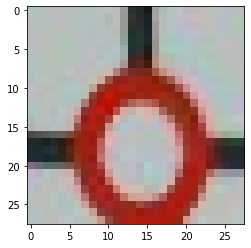

In [11]:
plt.imshow(image_list[2])

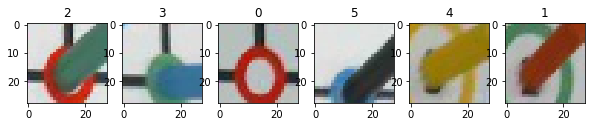

In [12]:
f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6, figsize=(10,10))
    
ax1.set_title(np.argmax(result[0]))
ax1.imshow(image_list[0])

ax2.set_title(np.argmax(result[1]))
ax2.imshow(image_list[1])

ax3.set_title(np.argmax(result[2]))
ax3.imshow(image_list[2])

ax4.set_title(np.argmax(result[3]))
ax4.imshow(image_list[3])

ax5.set_title(np.argmax(result[4]))
ax5.imshow(image_list[4])

ax6.set_title(np.argmax(result[5]))
ax6.imshow(image_list[5])

In [ ]:
# get index of predicted dog breed for each image in test set
block_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(block_predictions)==np.argmax(test_targets, axis=1))/len(block_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)